<a href="https://colab.research.google.com/github/paigekan/Machine-Learning/blob/main/HW_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [81]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [82]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [83]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [84]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [85]:
# Scale features
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [86]:
kmeans = KMeans(n_clusters = 5,
                random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [87]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

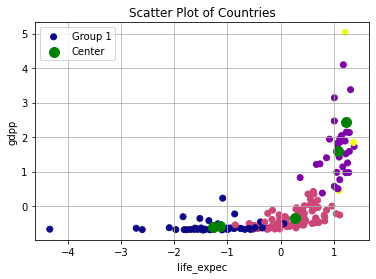

In [88]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 6 # life_expec
x2_index = 8 # gdpp

# Color-code the points (countries) based on their cluster label
plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='plasma')

# Plot the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='green', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Countries')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

Note: We fit our K-means algorithm on 9 variables, but we're only visualizing 2 in this graph.

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [92]:
WCSSs = [] # list to store the within-cluster sum of squares (WCSS) for each iteration
Ks = range(1, 15)
for k in Ks:
  kmeans = KMeans(n_clusters = k, init = "random", n_init = 30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)
  # kmeans.inertia_ represents the sum of squared distances of samples 
  # to their closest cluster center

In [ ]:
# In one line
#WCSSs = [KMeans(n_clusters = k, init = "random", n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

In [93]:
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 631.2572342807226,
 570.3318803839963,
 509.05670295827656,
 466.46173539101744,
 427.02847554449534,
 393.83923476154155,
 380.12629122137326,
 360.0144445835381,
 332.58546602127774,
 319.9855286239425]

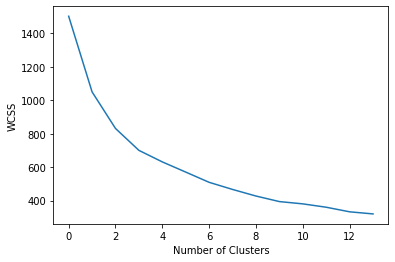

In [94]:
# Visualize Elbow Method
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Based on the Elbow Method, the optimal number of clusters appears to be approximately K = 8.

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [117]:
# Choose a number of clusters
k = 4

# Fit the model
kmeans = KMeans(n_clusters = k, init = "random", n_init = 30).fit(X_scaled)

Based on the above plot and the fact that the World Bank categorizes nations into 4 groups—low, lower-middle, upper-middle, and high—when classifying national economies, I chose the number of clusters to be K = 4. I am interested to see how the clusters identified by K-means compare with those classified by the World Bank.

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [118]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
preds # this outputs the cluster label for each country, in order of original df

,0
0,0
1,2
2,2
3,0
4,2
...,...
162,2
163,2
164,2
165,0


In [119]:
# Concatenate country name and corresponding cluster label into one table 
output = pd.concat([preds, names], axis = 1)
output

,0,country
0,0,Afghanistan
1,2,Albania
2,2,Algeria
3,0,Angola
4,2,Antigua and Barbuda
...,...,...
162,2,Vanuatu
163,2,Venezuela
164,2,Vietnam
165,0,Yemen


In [120]:
# Countries in cluster 0
print("Cluster 0: ")
list(output[output[0] == 0]["country"])

Cluster 0: 


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [121]:
# Countries in cluster 1
print("Cluster 1: ")
list(output[output[0] == 1]["country"])

Cluster 1: 


['Luxembourg', 'Malta', 'Singapore']

In [122]:
# Countries in cluster 2
print("Cluster 2: ")
list(output[output[0] == 2]["country"])

Cluster 2: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent an

In [123]:
# Countries in cluster 3
print("Cluster 3: ")
list(output[output[0] == 3]["country"])

Cluster 3: 


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

Cluster 0 contains mostly African countries. Cluster 1 is comprised of three very small countries. Cluster 4 seems to align with the high income economies classified by the World Bank.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interpretation

In [126]:
# Append cluster labels to the features
stats = pd.concat([output, X], axis = 1)
stats # Now we can see the original features for each country + the cluster label

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,2,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,2,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,2,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [127]:
stats.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
2,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333


# Q7.) Write an observation about the descriptive statistics.

As noted earlier, cluster 1 includes three small countries. Based on the descriptive statistics, we see that on average, the features of cluster 1 are nearly identical to those of cluster 4 (which are almost certainly the high income economies as classified by the World Bank), with the only differences being in terms of exports and imports. More specifically, the small countries in cluster 1 have significantly higher exports and imports compared to those in cluster 4.